In [1]:
from sklearn.linear_model import LogisticRegression # Logistic Regression
from sklearn.neighbors import KNeighborsClassifier # K-Nearest Neighbbors
from sklearn.tree import DecisionTreeClassifier # Decision Tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

C:\Users\sushant\anaconda3\envs\project\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\sushant\anaconda3\envs\project\lib\site-packages\numpy\.libs\libopenblas.PYQHXLVVQ7VESDPUVUADXEVJOBGHJPAY.gfortran-win_amd64.dll
C:\Users\sushant\anaconda3\envs\project\lib\site-packages\numpy\.libs\libopenblas.WCDJNK7YVMPZQ2ME2ZZHJJRJ3JIKNDB7.gfortran-win_amd64.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


In [2]:
import pandas as pd #
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.preprocessing import RobustScaler

In [3]:
df_train=pd.read_csv("datasets/PCOS_clean_data_without_infertility.csv")

In [4]:
df_train.head()

PCOS (Y/N)  Age (yrs)  Weight (Kg)  Height(Cm)    BMI  Blood Group  \
0           0         28         44.6       152.0  19.30           15   
1           0         36         65.0       161.5  24.92           15   
2           1         33         68.8       165.0  25.27           11   
3           0         37         65.0       148.0  29.67           13   
4           0         25         52.0       161.0  20.06           11   

   Pulse rate(bpm)  RR (breaths/min)  Hb(g/dl)  Cycle(R/I)  ...  Pimples(Y/N)  \
0               78                22     10.48           0  ...             0   
1               74                20     11.70           0  ...             0   
2               72                18     11.80           0  ...             1   
3               72                20     12.00           0  ...             0   
4               72                18     10.00           0  ...             0   

   Fast food (Y/N)  Reg.Exercise(Y/N)  BP _Systolic (mmHg)  \
0              1.0                  0                  110   
1              0.0                  0                  120   
2              1.0                  0                  120   
3              0.0                  0                  120   
4              0.0                  0                  120   

   BP _Diastolic (mmHg)  Follicle No. (L)  Follicle No. (R)  \
0                    80                 3                 3   
1                    70                 3                 5   
2                    80                13                15   
3                    70                 2                 2   
4                    80                 3                 4   

   Avg. F size (L) (mm)  Avg. F size (R) (mm)  Endometrium (mm)  
0                  18.0                  18.0               8.5  
1                  15.0                  14.0               3.7  
2                  18.0                  20.0              10.0  
3                  15.0                  14.0               7.5  
4                  16.0                  14.0               7.0  

[5 rows x 42 columns]

In [5]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 538 entries, 0 to 537
Data columns (total 42 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   PCOS (Y/N)              538 non-null    int64  
 1   Age (yrs)               538 non-null    int64  
 2   Weight (Kg)             538 non-null    float64
 3   Height(Cm)              538 non-null    float64
 4   BMI                     538 non-null    float64
 5   Blood Group             538 non-null    int64  
 6   Pulse rate(bpm)         538 non-null    int64  
 7   RR (breaths/min)        538 non-null    int64  
 8   Hb(g/dl)                538 non-null    float64
 9   Cycle(R/I)              538 non-null    int64  
 10  Cycle length(days)      538 non-null    int64  
 11  Marraige Status (Yrs)   538 non-null    float64
 12  Pregnant(Y/N)           538 non-null    int64  
 13  No. of aborptions       538 non-null    int64  
 14  I   beta-HCG(mIU/mL)    538 non-null    fl

In [6]:
df_train.columns

Index(['PCOS (Y/N)', 'Age (yrs)', 'Weight (Kg)', 'Height(Cm)', 'BMI',
       'Blood Group', 'Pulse rate(bpm)', 'RR (breaths/min)', 'Hb(g/dl)',
       'Cycle(R/I)', 'Cycle length(days)', 'Marraige Status (Yrs)',
       'Pregnant(Y/N)', 'No. of aborptions', 'I   beta-HCG(mIU/mL)',
       'II    beta-HCG(mIU/mL)', 'FSH(mIU/mL)', 'LH(mIU/mL)', 'FSH/LH',
       'Hip(inch)', 'Waist(inch)', 'Waist:Hip Ratio', 'TSH (mIU/L)',
       'AMH(ng/mL)', 'PRL(ng/mL)', 'Vit D3 (ng/mL)', 'PRG(ng/mL)',
       'RBS(mg/dl)', 'Weight gain(Y/N)', 'hair growth(Y/N)',
       'Skin darkening (Y/N)', 'Hair loss(Y/N)', 'Pimples(Y/N)',
       'Fast food (Y/N)', 'Reg.Exercise(Y/N)', 'BP _Systolic (mmHg)',
       'BP _Diastolic (mmHg)', 'Follicle No. (L)', 'Follicle No. (R)',
       'Avg. F size (L) (mm)', 'Avg. F size (R) (mm)', 'Endometrium (mm)'],
      dtype='object')

In [7]:
def getLabelCount(df,target):
    return sorted([( labelValue,len(df.loc[df[target] == labelValue]) ) for labelValue in df[target].unique()])
TARGET = "PCOS (Y/N)"
labelCount = getLabelCount(df_train,TARGET)
labelCount

[(0, 362), (1, 176)]

<AxesSubplot:>

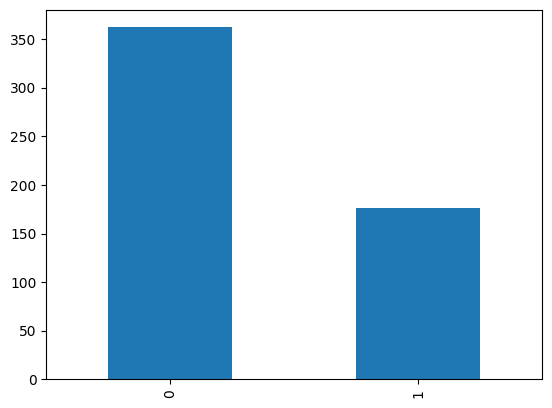

In [8]:
df_train['PCOS (Y/N)'].value_counts().plot(kind='bar')

In [9]:
def dynamic_label_encode(df):
    encoded_df = df.copy()
    label_encoders = {}

    for column in df.select_dtypes(include=['object']).columns:
        le = preprocessing.LabelEncoder()
        encoded_df[column] = le.fit_transform(df[column])
        label_encoders[column] = le

    return encoded_df, label_encoders

encoded_df, label_encoders = dynamic_label_encode(df_train)

In [10]:
encoded_df

PCOS (Y/N)  Age (yrs)  Weight (Kg)  Height(Cm)    BMI  Blood Group  \
0             0         28         44.6     152.000  19.30           15   
1             0         36         65.0     161.500  24.92           15   
2             1         33         68.8     165.000  25.27           11   
3             0         37         65.0     148.000  29.67           13   
4             0         25         52.0     161.000  20.06           11   
..          ...        ...          ...         ...    ...          ...   
533           0         35         50.0     164.592  18.46           17   
534           0         30         63.2     158.000  25.32           15   
535           0         36         54.0     152.000  23.37           13   
536           0         27         50.0     150.000  22.22           15   
537           1         23         82.0     165.000  30.12           13   

     Pulse rate(bpm)  RR (breaths/min)  Hb(g/dl)  Cycle(R/I)  ...  \
0                 78                22     10.48           0  ...   
1                 74                20     11.70           0  ...   
2                 72                18     11.80           0  ...   
3                 72                20     12.00           0  ...   
4                 72                18     10.00           0  ...   
..               ...               ...       ...         ...  ...   
533               72                16     11.00           0  ...   
534               72                18     10.80           0  ...   
535               74                20     10.80           0  ...   
536               74                20     12.00           1  ...   
537               80                20     10.20           1  ...   

     Pimples(Y/N)  Fast food (Y/N)  Reg.Exercise(Y/N)  BP _Systolic (mmHg)  \
0               0              1.0                  0                  110   
1               0              0.0                  0                  120   
2               1              1.0                  0                  120   
3               0              0.0                  0                  120   
4               0              0.0                  0                  120   
..            ...              ...                ...                  ...   
533             0              0.0                  0                  110   
534             0              0.0                  0                  110   
535             0              0.0                  0                  110   
536             1              0.0                  0                  110   
537             1              1.0                  0                  120   

     BP _Diastolic (mmHg)  Follicle No. (L)  Follicle No. (R)  \
0                      80                 3                 3   
1                      70                 3                 5   
2                      80                13                15   
3                      70                 2                 2   
4                      80                 3                 4   
..                    ...               ...               ...   
533                    70                 1                 0   
534                    70                 9                 7   
535                    80                 1                 0   
536                    70                 7                 6   
537                    70                 9                10   

     Avg. F size (L) (mm)  Avg. F size (R) (mm)  Endometrium (mm)  
0                    18.0                  18.0               8.5  
1                    15.0                  14.0               3.7  
2                    18.0                  20.0              10.0  
3                    15.0                  14.0               7.5  
4                    16.0                  14.0               7.0  
..                    ...                   ...               ...  
533                  17.5                  10.0               6.7  
534          

In [11]:
b=encoded_df
b.to_csv("preprocess.csv")
encoded_df

PCOS (Y/N)  Age (yrs)  Weight (Kg)  Height(Cm)    BMI  Blood Group  \
0             0         28         44.6     152.000  19.30           15   
1             0         36         65.0     161.500  24.92           15   
2             1         33         68.8     165.000  25.27           11   
3             0         37         65.0     148.000  29.67           13   
4             0         25         52.0     161.000  20.06           11   
..          ...        ...          ...         ...    ...          ...   
533           0         35         50.0     164.592  18.46           17   
534           0         30         63.2     158.000  25.32           15   
535           0         36         54.0     152.000  23.37           13   
536           0         27         50.0     150.000  22.22           15   
537           1         23         82.0     165.000  30.12           13   

     Pulse rate(bpm)  RR (breaths/min)  Hb(g/dl)  Cycle(R/I)  ...  \
0                 78                22     10.48           0  ...   
1                 74                20     11.70           0  ...   
2                 72                18     11.80           0  ...   
3                 72                20     12.00           0  ...   
4                 72                18     10.00           0  ...   
..               ...               ...       ...         ...  ...   
533               72                16     11.00           0  ...   
534               72                18     10.80           0  ...   
535               74                20     10.80           0  ...   
536               74                20     12.00           1  ...   
537               80                20     10.20           1  ...   

     Pimples(Y/N)  Fast food (Y/N)  Reg.Exercise(Y/N)  BP _Systolic (mmHg)  \
0               0              1.0                  0                  110   
1               0              0.0                  0                  120   
2               1              1.0                  0                  120   
3               0              0.0                  0                  120   
4               0              0.0                  0                  120   
..            ...              ...                ...                  ...   
533             0              0.0                  0                  110   
534             0              0.0                  0                  110   
535             0              0.0                  0                  110   
536             1              0.0                  0                  110   
537             1              1.0                  0                  120   

     BP _Diastolic (mmHg)  Follicle No. (L)  Follicle No. (R)  \
0                      80                 3                 3   
1                      70                 3                 5   
2                      80                13                15   
3                      70                 2                 2   
4                      80                 3                 4   
..                    ...               ...               ...   
533                    70                 1                 0   
534                    70                 9                 7   
535                    80                 1                 0   
536                    70                 7                 6   
537                    70                 9                10   

     Avg. F size (L) (mm)  Avg. F size (R) (mm)  Endometrium (mm)  
0                    18.0                  18.0               8.5  
1                    15.0                  14.0               3.7  
2                    18.0                  20.0              10.0  
3                    15.0                  14.0               7.5  
4                    16.0                  14.0               7.0  
..                    ...                   ...               ...  
533                  17.5                  10.0               6.7  
534          

In [12]:
df_numerics_only = df_train.select_dtypes(include=np.number)

In [13]:
to_scale = [col for col in encoded_df.columns if encoded_df[col].max()>1]
scaler = RobustScaler()
scaled =scaler.fit_transform(encoded_df[to_scale])
scaled = pd.DataFrame(scaled, columns=to_scale)

# replace original columns with scaled columns
for col in scaled:
    encoded_df[col] = scaled[col]

In [14]:
to_scale

['Age (yrs)',
 'Weight (Kg)',
 'Height(Cm)',
 'BMI',
 'Blood Group',
 'Pulse rate(bpm)',
 'RR (breaths/min)',
 'Hb(g/dl)',
 'Cycle length(days)',
 'Marraige Status (Yrs)',
 'No. of aborptions',
 'I   beta-HCG(mIU/mL)',
 'II    beta-HCG(mIU/mL)',
 'FSH(mIU/mL)',
 'LH(mIU/mL)',
 'FSH/LH',
 'Hip(inch)',
 'Waist(inch)',
 'TSH (mIU/L)',
 'AMH(ng/mL)',
 'PRL(ng/mL)',
 'Vit D3 (ng/mL)',
 'PRG(ng/mL)',
 'RBS(mg/dl)',
 'BP _Systolic (mmHg)',
 'BP _Diastolic (mmHg)',
 'Follicle No. (L)',
 'Follicle No. (R)',
 'Avg. F size (L) (mm)',
 'Avg. F size (R) (mm)',
 'Endometrium (mm)']

In [15]:
X=encoded_df.drop(["PCOS (Y/N)",
            "Blood Group",
            "Height(Cm)",
            "Pregnant(Y/N)",
             "PRG(ng/mL)",
            "RR (breaths/min)",
            "No. of aborptions",
            "FSH/LH",
            "I   beta-HCG(mIU/mL)",
            "II    beta-HCG(mIU/mL)",
            "TSH (mIU/L)",
            "FSH(mIU/mL)",
            "LH(mIU/mL)",
            "Waist:Hip Ratio",
            "PRL(ng/mL)",
            "BP _Diastolic (mmHg)",
            "BP _Systolic (mmHg)",
            "Reg.Exercise(Y/N)",
            "RBS(mg/dl)"
            ], axis=1)
Y=encoded_df["PCOS (Y/N)"]
print(X.shape)
print(Y.shape)

(538, 23)
(538,)


In [16]:
# sklearn to split data into training and testing sets
from sklearn.model_selection import train_test_split
# Split the data into training and testing sets
X_train,X_test,y_train,y_test = train_test_split(X, Y, test_size = 0.25)

In [17]:
print(X_train.shape)
print(X_test.shape)

(403, 23)
(135, 23)


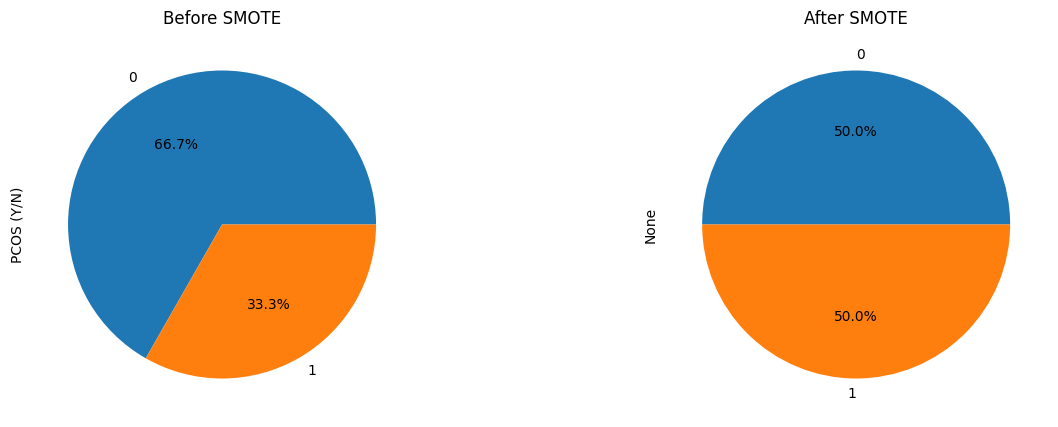

In [18]:
from imblearn.over_sampling import SMOTE 
smote = SMOTE()
X_train_new, y_train_new = smote.fit_resample(X_train, y_train.values.ravel())
import matplotlib.ticker as mtick

# to demonstrate the effect of SMOTE over imbalanced datasets
fig, (ax1, ax2) = plt.subplots(ncols = 2, figsize =(15, 5))
ax1.set_title('Before SMOTE')
pd.Series(y_train).value_counts().plot.pie(autopct='%.1f%%',ax=ax1)
ax1.yaxis.set_major_formatter(mtick.PercentFormatter())
ax2.set_title('After SMOTE')  
pd.Series(y_train_new).value_counts().plot.pie(autopct='%.1f%%',ax=ax2)
ax2.yaxis.set_major_formatter(mtick.PercentFormatter())
plt.show()

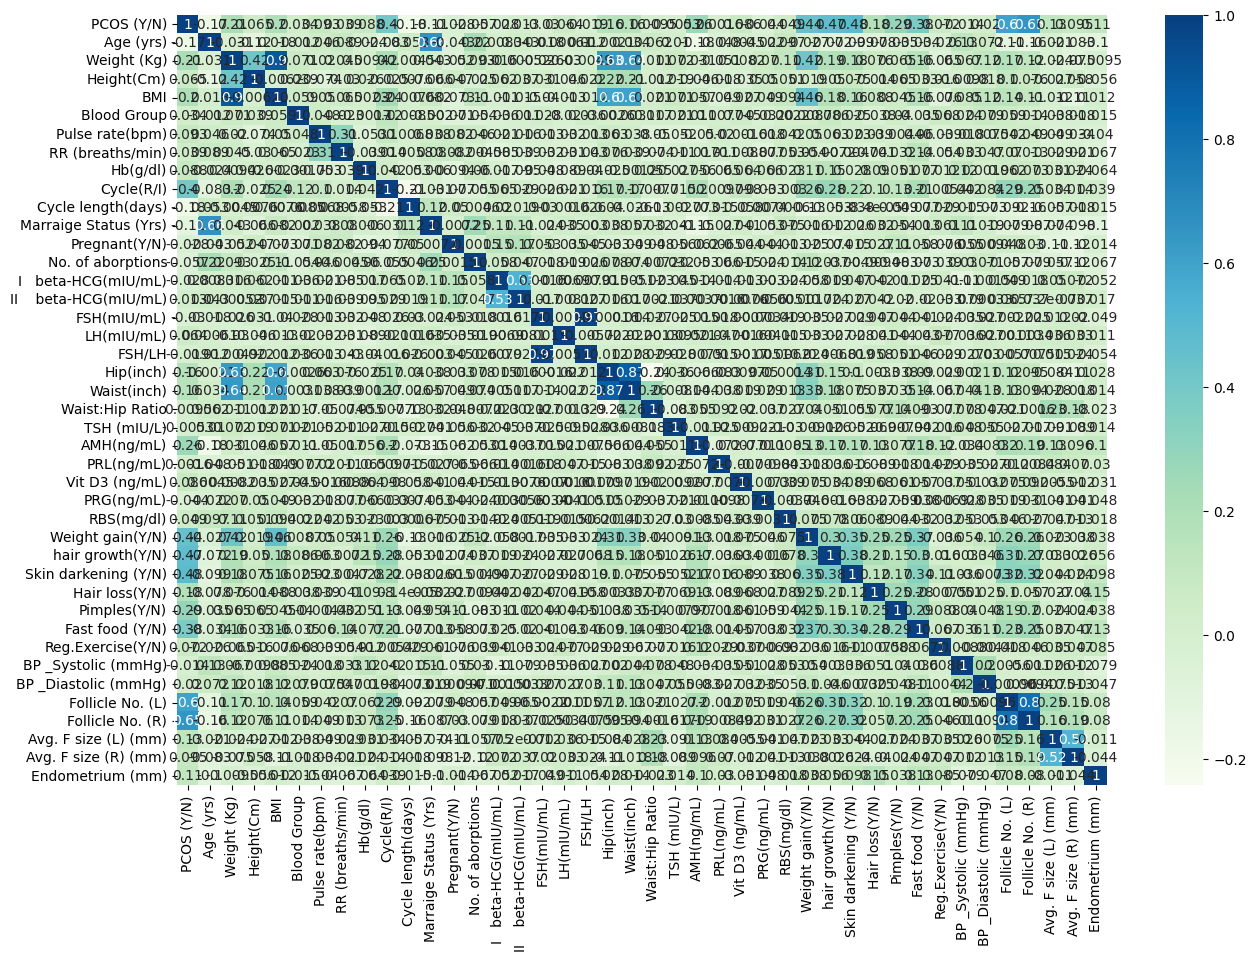

In [19]:
plt.figure(figsize= (15, 10))
sns.heatmap(df_numerics_only.corr(), annot=True, cmap= 'GnBu')
plt.show()

In [20]:
lr =  LogisticRegression()
lr.fit(X_train_new, y_train_new)
y_pred=lr.predict(X_test)

In [21]:
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy Logistic Regression:",metrics.accuracy_score(y_test, y_pred))

Accuracy Logistic Regression: 0.8592592592592593


In [22]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

# actual values
actual = y_test
# predicted values
predicted =y_pred

# confusion matrix
matrixresult = confusion_matrix(actual,predicted, labels=[1,0])
print('Confusion matrix : \n',matrixresult)

# outcome values order in sklearn
tp, fn, fp, tn = confusion_matrix(actual,predicted,labels=[1,0]).reshape(-1)
print('Outcome values : \n', tp, fn, fp, tn)

# classification report for precision, recall f1-score and accuracy
matrix = classification_report(actual,predicted,labels=[1,0])
print('Classification report Logistic Regression : \n',matrix)

Confusion matrix : 
 [[35  7]
 [12 81]]
Outcome values : 
 35 7 12 81
Classification report Logistic Regression : 
               precision    recall  f1-score   support

           1       0.74      0.83      0.79        42
           0       0.92      0.87      0.90        93

    accuracy                           0.86       135
   macro avg       0.83      0.85      0.84       135
weighted avg       0.87      0.86      0.86       135



In [23]:
import joblib
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("LogisticRegression:",metrics.accuracy_score(y_test, y_pred))

# Save the trained model to a file using joblib
model_filename1 = "models/Logistic_Regression_Classify_model.joblib"
joblib.dump(lr, model_filename1)
print(f"Model saved as {model_filename1}")

LogisticRegression: 0.8592592592592593


FileNotFoundError: [Errno 2] No such file or directory: 'models/Logistic_Regression_Classify_model.joblib'

In [ ]:
from sklearn.neighbors import KNeighborsClassifier  
classifier= KNeighborsClassifier(n_neighbors=3)  
classifier.fit(X_train_new, y_train_new)  
y_pred4=classifier.predict(X_test)

In [ ]:
from sklearn import metrics
print("Accuracy KNN:",metrics.accuracy_score(y_test, y_pred4))

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

# actual values
actual = y_test
# predicted values
predicted =y_pred4

# confusion matrix
matrixresult = confusion_matrix(actual,predicted, labels=[1,0])
print('Confusion matrix : \n',matrixresult)

# outcome values order in sklearn
tp, fn, fp, tn = confusion_matrix(actual,predicted,labels=[1,0]).reshape(-1)
print('Outcome values : \n', tp, fn, fp, tn)

# classification report for precision, recall f1-score and accuracy
matrix = classification_report(actual,predicted,labels=[1,0])
print('Classification KNeighborsClassifier : \n',matrix)

In [ ]:
import joblib
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("KNeighborsClassifier :",metrics.accuracy_score(y_test, y_pred4))

# Save the trained model to a file using joblib
model_filename1 = "models/KNeighbors_Classifier_Classify_model.joblib"
joblib.dump(classifier, model_filename1)
print(f"Model saved as {model_filename1}")

In [ ]:
# Create an instance of the DecisionTreeClassifier
clf = DecisionTreeClassifier()

# Fit the model to your training data
clf.fit(X_train_new, y_train_new)

In [ ]:
y_pred1 = clf.predict(X_test)

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

# actual values
actual = y_test
# predicted values
predicted =y_pred1

# confusion matrix
matrixresult = confusion_matrix(actual,predicted, labels=[1,0])
print('Confusion matrix : \n',matrixresult)

# outcome values order in sklearn
tp, fn, fp, tn = confusion_matrix(actual,predicted,labels=[1,0]).reshape(-1)
print('Outcome values : \n', tp, fn, fp, tn)

# classification report for precision, recall f1-score and accuracy
matrix = classification_report(actual,predicted,labels=[1,0])
print('Classification DecisionTreeClassifier : \n',matrix)

In [ ]:
import joblib
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("DecisionTreeClassifier  :",metrics.accuracy_score(y_test, y_pred4))

# Save the trained model to a file using joblib
model_filename1 = "models/DecisionTree_Classifier_Classify_model.joblib"
joblib.dump(classifier, model_filename1)
print(f"Model saved as {model_filename1}")

In [ ]:
model = SVC(kernel='linear')  # You can choose different kernel functions like 'linear', 'rbf', etc.

# Train the model on the training data
model.fit(X_train_new, y_train_new)

# Make predictions on the test data
y_pred2 = model.predict(X_test)

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

# actual values
actual = y_test
# predicted values
predicted =y_pred2

# confusion matrix
matrixresult = confusion_matrix(actual,predicted, labels=[1,0])
print('Confusion matrix : \n',matrixresult)

# outcome values order in sklearn
tp, fn, fp, tn = confusion_matrix(actual,predicted,labels=[1,0]).reshape(-1)
print('Outcome values : \n', tp, fn, fp, tn)

# classification report for precision, recall f1-score and accuracy
matrix = classification_report(actual,predicted,labels=[1,0])
print('Classification SVC : \n',matrix)

In [ ]:
import joblib
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("SVC:",metrics.accuracy_score(y_test, y_pred4))

# Save the trained model to a file using joblib
model_filename1 = "models/SVC_linear_Classify_model.joblib"
joblib.dump(classifier, model_filename1)
print(f"Model saved as {model_filename1}")

In [ ]:
model1 = SVC(kernel='rbf')  # You can choose different kernel functions like 'linear', 'rbf', etc.

# Train the model on the training data
model1.fit(X_train_new, y_train_new)

# Make predictions on the test data
y_pred10 = model1.predict(X_test)

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

# actual values
actual = y_test
# predicted values
predicted =y_pred10

# confusion matrix
matrixresult = confusion_matrix(actual,predicted, labels=[1,0])
print('Confusion matrix : \n',matrixresult)

# outcome values order in sklearn
tp, fn, fp, tn = confusion_matrix(actual,predicted,labels=[1,0]).reshape(-1)
print('Outcome values : \n', tp, fn, fp, tn)

# classification report for precision, recall f1-score and accuracy
matrix = classification_report(actual,predicted,labels=[1,0])
print('Classification SVC : \n',matrix)

In [ ]:
import joblib
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("SVC rbf:",metrics.accuracy_score(y_test, y_pred4))

# Save the trained model to a file using joblib
model_filename1 = "models/SVC_rbf_Classify_model.joblib"
joblib.dump(classifier, model_filename1)
print(f"Model saved as {model_filename1}")

In [ ]:
# Create an instance of the DecisionTreeClassifier
random = RandomForestClassifier()

# Fit the model to your training data
random.fit(X_train_new, y_train_new)

In [ ]:
# Make predictions on the test data
y_pred5 = model.predict(X_test)

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

# actual values
actual = y_test
# predicted values
predicted =y_pred5

# confusion matrix
matrixresult = confusion_matrix(actual,predicted, labels=[1,0])
print('Confusion matrix : \n',matrixresult)

# outcome values order in sklearn
tp, fn, fp, tn = confusion_matrix(actual,predicted,labels=[1,0]).reshape(-1)
print('Outcome values : \n', tp, fn, fp, tn)

# classification report for precision, recall f1-score and accuracy
matrix = classification_report(actual,predicted,labels=[1,0])
print('Classification SVC : \n',matrix)

In [ ]:
import joblib
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy random_forest:",metrics.accuracy_score(y_test, y_pred5))

# Save the trained model to a file using joblib
model_filename1 = "models/RandomForestClassifier_Classify_model.joblib"
joblib.dump(random, model_filename1)
print(f"Model saved as {model_filename1}")